# Занятие 12. Проект построения модели машинного обучения для бинарной классификации
### Kirill Zakharov

### 1. Problem Definition, Loading the libraries and the dataset

In [17]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [6]:
# Load dataset
filename = 'wine.csv'

dataset = pd.read_csv(filename)
dataset = dataset.fillna(method='ffill')

 ### 2. Analyze Data

#### Descriptive Statistics

In [9]:
# shape
dataset.shape

(6497, 13)

In [7]:
# types
# types
dataset.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
# head
dataset.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [11]:
# descriptions
# descriptions
set_option('precision', 3)
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.216,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.218,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


In [13]:
# class distribution
dataset.groupby('type').size()

type
red      1599
white    4898
dtype: int64

### Visualization

##### Unimodal Data Visualizations

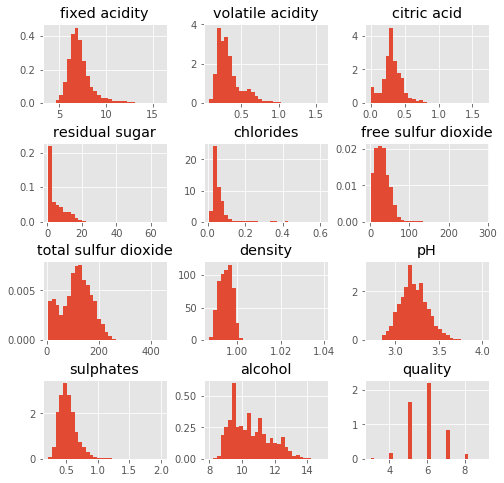

In [55]:
# histograms
dataset.hist(figsize=(8,8), density=True, layout=(4,3), bins=30, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

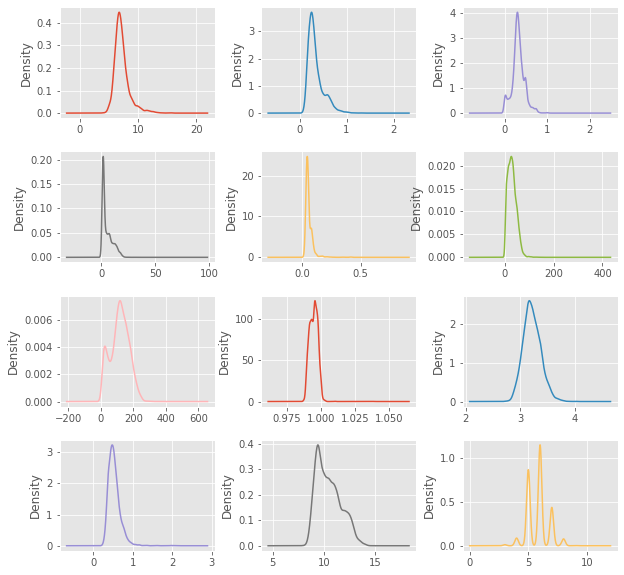

In [56]:
# density
dataset.plot(kind='density', figsize=(10,10), subplots=True, layout=(4,3), sharex=False, legend=False)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

pyplot.show()

##### Multimodal Data Visualizations

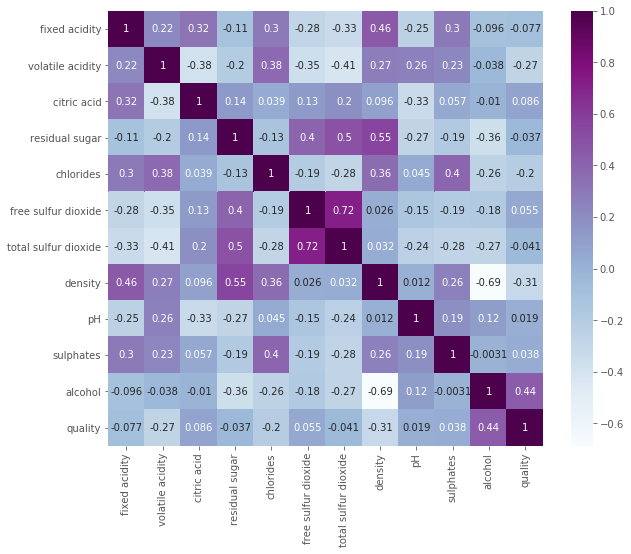

In [54]:
# correlation matrix
fig = plt.figure(figsize=(10,8))

sns.heatmap(dataset.corr(), cmap='BuPu', annot = True, square=True)

b1,t1=plt.ylim()
b1+=0.5
t1-=0.5
plt.ylim(b1, t1)
plt.show()

### 3. Validation Dataset

In [57]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:]
Y = array[:,0]
validation_size = 0.33
seed = 5
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [58]:
# Test options and evaluation metric
num_folds = 10
seed = 5
scoring = 'accuracy'

In [59]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [60]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.979550 (0.008056)
LDA: 0.994026 (0.003117)
KNN: 0.944857 (0.012484)
CART: 0.980929 (0.005998)
NB: 0.970589 (0.009683)
SVM: 0.945775 (0.008898)


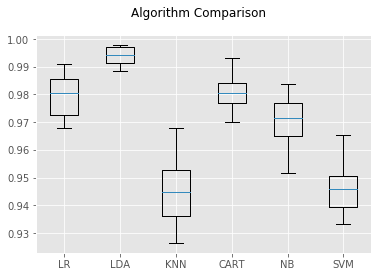

In [61]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [62]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.992417 (0.002068)
ScaledLDA: 0.994026 (0.003117)
ScaledKNN: 0.992418 (0.002306)
ScaledCART: 0.980929 (0.006822)
ScaledNB: 0.974725 (0.008474)
ScaledSVM: 0.994716 (0.003415)


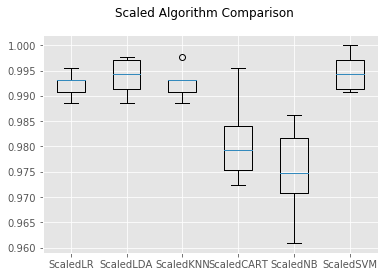

In [63]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [64]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.993796 using {'n_neighbors': 1}
0.993796 (0.004111) with: {'n_neighbors': 1}
0.991728 (0.003589) with: {'n_neighbors': 3}
0.992417 (0.002307) with: {'n_neighbors': 5}
0.992417 (0.003563) with: {'n_neighbors': 7}
0.992647 (0.003672) with: {'n_neighbors': 9}
0.992417 (0.004113) with: {'n_neighbors': 11}
0.992417 (0.003091) with: {'n_neighbors': 13}
0.992417 (0.003710) with: {'n_neighbors': 15}
0.992647 (0.003376) with: {'n_neighbors': 17}
0.991728 (0.003588) with: {'n_neighbors': 19}
0.991268 (0.004453) with: {'n_neighbors': 21}


In [65]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995864 using {'C': 2.0, 'kernel': 'rbf'}
0.993107 (0.002717) with: {'C': 0.1, 'kernel': 'linear'}
0.975643 (0.006750) with: {'C': 0.1, 'kernel': 'poly'}
0.991728 (0.003590) with: {'C': 0.1, 'kernel': 'rbf'}
0.973805 (0.007147) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.994026 (0.002757) with: {'C': 0.3, 'kernel': 'linear'}
0.984835 (0.004011) with: {'C': 0.3, 'kernel': 'poly'}
0.994026 (0.002757) with: {'C': 0.3, 'kernel': 'rbf'}
0.960018 (0.007072) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.994026 (0.002344) with: {'C': 0.5, 'kernel': 'linear'}
0.988051 (0.003530) with: {'C': 0.5, 'kernel': 'poly'}
0.994945 (0.003216) with: {'C': 0.5, 'kernel': 'rbf'}
0.957721 (0.008053) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.994256 (0.002569) with: {'C': 0.7, 'kernel': 'linear'}
0.988971 (0.002677) with: {'C': 0.7, 'kernel': 'poly'}
0.994715 (0.003415) with: {'C': 0.7, 'kernel': 'rbf'}
0.954044 (0.007128) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.994026 (0.002758) with: {'C': 0.9, 'kernel': 'linear'

### 7. Ensemble Methods

In [67]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.992877 (0.003476)
GBM: 0.991730 (0.004380)
RF: 0.991728 (0.002560)
ET: 0.993338 (0.004644)


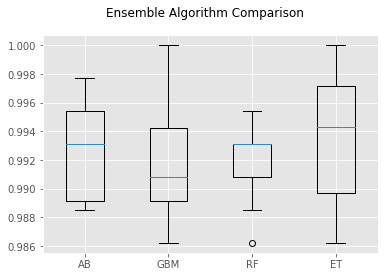

In [68]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 8. Finalize Model

In [72]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1, kernel='rbf')
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9976689976689976
[[ 553    4]
 [   1 1587]]
              precision    recall  f1-score   support

         red       1.00      0.99      1.00       557
       white       1.00      1.00      1.00      1588

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145

